# Match Pred

In [1]:
from fastai.tabular import *

## Data

### Load data

In [177]:
path = Path("./data/ligamx/partidos_tabla")

In [178]:
data_lmx = pd.read_pickle(path)

In [179]:
data_lmx.head()

,LOC,VIS,GL,GV,JRD,FECHA,HORA,ANO,TIPO,L_POS,...,L_R_PTS_JJ,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ
0,puebla,tijuana,1.0,3.0,1.0,19/7/2019,19:00,2019,apertura,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,atlas,fc juarez,1.0,0.0,1.0,19/7/2019,21:45,2019,apertura,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,atletico de san luis,unam,0.0,2.0,1.0,20/7/2019,17:00,2019,apertura,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pachuca,leon,1.0,3.0,1.0,20/7/2019,17:00,2019,apertura,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,america,monterrey,4.0,2.0,1.0,20/7/2019,19:05,2019,apertura,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fix the data

In [182]:
dic = {}
for c in data_lmx.columns:
    x = data_lmx[c].isnull().sum()
    if x > 0:
      dic[c] = x
      data_lmx[c].fillna(0, inplace = True) 
        

In [183]:
dic

{}

### Create data

let's drop the date by now

In [184]:
data_lmx.reset_index(drop=True, inplace=True)

In [185]:
data_lmx.GL = data_lmx.GL.astype(str)
data_lmx.GV = data_lmx.GV.astype(str)

In [186]:
data_lmx.columns

Index(['LOC', 'VIS', 'GL', 'GV', 'JRD', 'FECHA', 'HORA', 'ANO', 'TIPO',
       'L_POS', 'L_JJ', 'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ',
       'L_R_GC_JJ', 'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_POS', 'V_JJ', 'V_R_JG_JJ',
       'V_R_JE_JJ', 'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ',
       'V_R_PTS_JJ'],
      dtype='object')

In [187]:
del data_lmx['HORA']
del data_lmx['FECHA']

In [188]:
data_lmx['RES'] =  np.where(data_lmx.GL >= data_lmx.GV, 2, 0)

In [189]:
data_lmx['RES'] =  np.where(data_lmx.GL == data_lmx.GV, 1, data_lmx.RES)

In [190]:
data_lmx

,LOC,VIS,GL,GV,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,puebla,tijuana,1.0,3.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,atlas,fc juarez,1.0,0.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,atletico de san luis,unam,0.0,2.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,pachuca,leon,1.0,3.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,america,monterrey,4.0,2.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
5,tigres,morelia,4.0,2.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,necaxa,cruz azul,0.0,0.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,toluca,queretaro,0.0,2.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,santos,guadalajara,3.0,0.0,1.0,2019,apertura,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
9,morelia,atlas,0.0,1.0,2.0,2019,apertura,14.0,1.0,0.000000,...,8.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0


In [191]:
del data_lmx['GL']
del data_lmx['GV']

In [192]:
data_lmx.head(n=150)

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,puebla,tijuana,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,atlas,fc juarez,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,atletico de san luis,unam,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,pachuca,leon,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,america,monterrey,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
5,tigres,morelia,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,necaxa,cruz azul,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,toluca,queretaro,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,santos,guadalajara,1.0,2019,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
9,morelia,atlas,2.0,2019,apertura,14.0,1.0,0.000000,0.000000,1.000000,...,8.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0


In [193]:
data = (TabularList.from_df(data_lmx, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(range(100, 300)))
       .label_from_df(cols=deep_vars)
       .databunch())

KeyError: 'L_ES_LOC'

In [195]:
data_lmx.head()

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,puebla,tijuana,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,atlas,fc juarez,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,atletico de san luis,unam,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,pachuca,leon,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,america,monterrey,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [196]:
second_data_lmx = pd.read_pickle('./data/ligamx/WLT')
second_data_lmx.head()

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,puebla,tijuana,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,atlas,fc juarez,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,atletico de san luis,unam,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,pachuca,leon,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,america,monterrey,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [199]:
data_lmx.columns == second_data_lmx.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [200]:
data_lmx.to_pickle('./data/ligamx/WLT2')

In [226]:
data.c

2

In [39]:
data_separated = []

for i in range(2012, 2020):
    data_separated.append(data_lmx[data_lmx.ANO == i])
    

In [40]:
x = 0
for i in data_separated:
    x += len(i)
x

2530

In [41]:
for i in data_separated:
    i.reset_index(drop=True, inplace=True)

In [42]:
data_separated[0]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,chiapas,tigres,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,tijuana,puebla,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,queretaro,leon,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,cruz azul,morelia,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,monterrey,america,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,santos,san luis,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,atlas,unam,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,toluca,guadalajara,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
8,atlante,pachuca,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,morelia,monterrey,2.0,2012,apertura,12.0,1.0,0.000000,1.000000,0.000000,...,11.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2


### Load data separated

In [6]:
data_separated = []
path = './data/ligamx/sep/'

for i in range(2012, 2020):
    data_separated.append(pd.read_pickle(path + str(i)))

## Model

### Regular Model

In [442]:
learn = tabular_learner(data, layers=[1000, 500, 200], emb_szs={'LOC':500, 'VIS':500},emb_drop=0.1, ps = [0.1, 0.1, 0.1], metrics=accuracy)

In [309]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [446]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [311]:
tabular_learner??

Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.00E-02


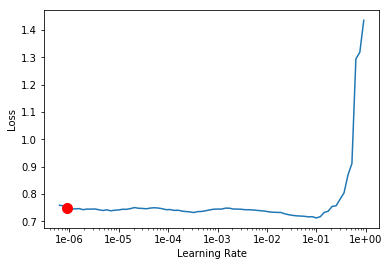

In [447]:
learn.recorder.plot(suggestion=True)

In [449]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.722860,0.652981,0.635000,00:02
1,0.659657,0.618857,0.690000,00:02
2,0.608116,0.600316,0.680000,00:02


In [361]:
TabularModel??

In [362]:
learn.model.embeds

ModuleList(
  (0): Embedding(27, 500)
  (1): Embedding(27, 500)
  (2): Embedding(19, 8)
  (3): Embedding(9, 5)
  (4): Embedding(3, 3)
  (5): Embedding(21, 9)
)

In [63]:
len(data_lmx)

2530

In [439]:
next(iter(data.train_dl))[0][0]

tensor([[26, 13,  1,  6,  1,  1],
        [ 8,  6, 10,  1,  2, 16],
        [21, 26, 10,  4,  2,  2],
        [ 3, 12, 13,  5,  2, 18],
        [18,  5, 16,  3,  2,  4],
        [23, 22,  4,  3,  1, 19],
        [11, 25,  7,  8,  1,  9],
        [16, 21, 13,  4,  2, 16],
        [12, 26,  8,  8,  1, 16],
        [23, 14, 14,  4,  2, 17],
        [ 2, 12,  9,  2,  1, 19],
        [14, 21,  7,  7,  2, 14],
        [25, 20, 14,  2,  2,  6],
        [14, 20, 10,  3,  1, 10],
        [12, 19, 15,  4,  1, 15],
        [18, 26, 17,  2,  1,  3],
        [13, 11, 18,  8,  2,  7],
        [13, 11,  8,  7,  2, 10],
        [10, 13, 15,  7,  2, 19],
        [ 8, 13,  6,  8,  1, 12],
        [ 2,  8,  4,  3,  2, 11],
        [22,  6,  4,  7,  2, 13],
        [ 6,  5,  9,  6,  2, 18],
        [26,  9,  9,  4,  2,  3],
        [21,  8, 15,  7,  2,  8],
        [13,  6,  6,  6,  1,  7],
        [ 6, 22, 15,  1,  1,  7],
        [26,  5,  3,  4,  1, 12],
        [18, 16,  4,  5,  2,  5],
        [26,  

In [406]:
x = torch.rand(10, 10)
x

tensor([[0.6456, 0.2472, 0.0372, 0.5843, 0.8127, 0.5583, 0.3879, 0.4578, 0.4482,
         0.9116],
        [0.2874, 0.1331, 0.7114, 0.4432, 0.4397, 0.3939, 0.3760, 0.2773, 0.7247,
         0.0675],
        [0.1242, 0.3121, 0.0894, 0.8671, 0.4213, 0.5100, 0.5171, 0.3916, 0.4444,
         0.4258],
        [0.1255, 0.6549, 0.0728, 0.0511, 0.5537, 0.9850, 0.6179, 0.2213, 0.2852,
         0.9363],
        [0.3107, 0.2149, 0.4804, 0.2723, 0.3000, 0.9240, 0.1940, 0.4035, 0.6583,
         0.0504],
        [0.4522, 0.6730, 0.2822, 0.8001, 0.9447, 0.3135, 0.5332, 0.3253, 0.7787,
         0.7537],
        [0.1085, 0.2138, 0.5981, 0.4612, 0.1321, 0.4728, 0.3183, 0.7352, 0.7922,
         0.6902],
        [0.3662, 0.7126, 0.6910, 0.2519, 0.2204, 0.0097, 0.9970, 0.0470, 0.5894,
         0.7637],
        [0.4308, 0.0931, 0.5529, 0.0666, 0.1096, 0.9105, 0.9410, 0.1409, 0.0842,
         0.1549],
        [0.0260, 0.4176, 0.6332, 0.0081, 0.8585, 0.8990, 0.6757, 0.5756, 0.1541,
         0.0786]])

In [422]:
y = x[:, :5].clone()
print(y)
z = x[:, 5:]
z

tensor([[0.6456, 0.2472, 0.0372, 0.5843, 0.8127],
        [0.2874, 0.1331, 0.7114, 0.4432, 0.4397],
        [0.1242, 0.3121, 0.0894, 0.8671, 0.4213],
        [0.1255, 0.6549, 0.0728, 0.0511, 0.5537],
        [0.3107, 0.2149, 0.4804, 0.2723, 0.3000],
        [0.4522, 0.6730, 0.2822, 0.8001, 0.9447],
        [0.1085, 0.2138, 0.5981, 0.4612, 0.1321],
        [0.3662, 0.7126, 0.6910, 0.2519, 0.2204],
        [0.4308, 0.0931, 0.5529, 0.0666, 0.1096],
        [0.0260, 0.4176, 0.6332, 0.0081, 0.8585]])


tensor([[1.0000e+03, 1.0000e+03, 1.0000e+03, 1.0000e+03, 1.0000e+03],
        [3.9393e-01, 3.7601e-01, 2.7731e-01, 7.2469e-01, 6.7454e-02],
        [5.1004e-01, 5.1708e-01, 3.9160e-01, 4.4443e-01, 4.2576e-01],
        [9.8501e-01, 6.1787e-01, 2.2127e-01, 2.8524e-01, 9.3625e-01],
        [9.2404e-01, 1.9402e-01, 4.0350e-01, 6.5825e-01, 5.0408e-02],
        [3.1352e-01, 5.3321e-01, 3.2527e-01, 7.7872e-01, 7.5366e-01],
        [4.7285e-01, 3.1829e-01, 7.3520e-01, 7.9216e-01, 6.9025e-01],
        [9.7453e-03, 9.9704e-01, 4.7045e-02, 5.8944e-01, 7.6366e-01],
        [9.1050e-01, 9.4096e-01, 1.4093e-01, 8.4222e-02, 1.5492e-01],
        [8.9899e-01, 6.7569e-01, 5.7562e-01, 1.5407e-01, 7.8628e-02]])

In [423]:
y[0] = 200

In [424]:
y

tensor([[2.0000e+02, 2.0000e+02, 2.0000e+02, 2.0000e+02, 2.0000e+02],
        [2.8738e-01, 1.3311e-01, 7.1136e-01, 4.4319e-01, 4.3970e-01],
        [1.2422e-01, 3.1207e-01, 8.9389e-02, 8.6709e-01, 4.2130e-01],
        [1.2548e-01, 6.5492e-01, 7.2792e-02, 5.1052e-02, 5.5374e-01],
        [3.1069e-01, 2.1492e-01, 4.8039e-01, 2.7234e-01, 3.0003e-01],
        [4.5219e-01, 6.7300e-01, 2.8223e-01, 8.0009e-01, 9.4468e-01],
        [1.0846e-01, 2.1381e-01, 5.9808e-01, 4.6123e-01, 1.3208e-01],
        [3.6618e-01, 7.1260e-01, 6.9100e-01, 2.5194e-01, 2.2044e-01],
        [4.3079e-01, 9.3073e-02, 5.5293e-01, 6.6633e-02, 1.0960e-01],
        [2.5950e-02, 4.1761e-01, 6.3315e-01, 8.1187e-03, 8.5852e-01]])

In [425]:
x

tensor([[6.4562e-01, 2.4715e-01, 3.7219e-02, 5.8432e-01, 8.1269e-01, 1.0000e+03,
         1.0000e+03, 1.0000e+03, 1.0000e+03, 1.0000e+03],
        [2.8738e-01, 1.3311e-01, 7.1136e-01, 4.4319e-01, 4.3970e-01, 3.9393e-01,
         3.7601e-01, 2.7731e-01, 7.2469e-01, 6.7454e-02],
        [1.2422e-01, 3.1207e-01, 8.9389e-02, 8.6709e-01, 4.2130e-01, 5.1004e-01,
         5.1708e-01, 3.9160e-01, 4.4443e-01, 4.2576e-01],
        [1.2548e-01, 6.5492e-01, 7.2792e-02, 5.1052e-02, 5.5374e-01, 9.8501e-01,
         6.1787e-01, 2.2127e-01, 2.8524e-01, 9.3625e-01],
        [3.1069e-01, 2.1492e-01, 4.8039e-01, 2.7234e-01, 3.0003e-01, 9.2404e-01,
         1.9402e-01, 4.0350e-01, 6.5825e-01, 5.0408e-02],
        [4.5219e-01, 6.7300e-01, 2.8223e-01, 8.0009e-01, 9.4468e-01, 3.1352e-01,
         5.3321e-01, 3.2527e-01, 7.7872e-01, 7.5366e-01],
        [1.0846e-01, 2.1381e-01, 5.9808e-01, 4.6123e-01, 1.3208e-01, 4.7285e-01,
         3.1829e-01, 7.3520e-01, 7.9216e-01, 6.9025e-01],
        [3.6618e-01, 7.1260

In [398]:
len(data_lmx.columns)

24

In [379]:
data_lmx.tail.

SyntaxError: invalid syntax (<ipython-input-379-f6951e6a1e45>, line 1)

In [296]:
data_lmx.iloc[100]

LOC               atlas
VIS           queretaro
JRD                  12
ANO                2019
TIPO           apertura
L_POS                11
L_JJ                 11
L_R_JG_JJ      0.363636
L_R_JE_JJ      0.181818
L_R_JP_JJ      0.454545
L_R_GF_JJ       1.09091
L_R_GC_JJ       1.18182
L_R_DIF_JJ   -0.0909091
L_R_PTS_JJ      1.27273
V_POS                 4
V_JJ                 10
V_R_JG_JJ           0.5
V_R_JE_JJ           0.3
V_R_JP_JJ           0.2
V_R_GF_JJ           1.9
V_R_GC_JJ           1.1
V_R_DIF_JJ          0.8
V_R_PTS_JJ          1.8
WIN                True
Name: 100, dtype: object

In [295]:
learn.predict(data_lmx.iloc[100])

(Category True, tensor(1), tensor([0.3371, 0.6629]))

In [134]:
learn.predict??

### Model using new separated data (random still)

In [41]:
deep_vars = ['RES']
#categorical values
cat_names = ['LOC', 'VIS', 'JRD', 'ANO', 'TIPO']
#continious variables
cont_names = ['L_JJ', 'L_POS', 'V_POS',
       'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ',
       'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_JJ', 'V_R_JG_JJ', 'V_R_JE_JJ',
       'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

In [51]:
data_separated[0]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,chiapas,tigres,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,tijuana,puebla,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
2,queretaro,leon,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,cruz azul,morelia,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,monterrey,america,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,santos,san luis,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,atlas,unam,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7,toluca,guadalajara,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
8,atlante,pachuca,1.0,2012,apertura,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,morelia,monterrey,2.0,2012,apertura,12.0,1.0,0.000000,1.000000,0.000000,...,11.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2


In [44]:
sub_data = data_separated[7]

val_rng = range(len(sub_data)-30, len(sub_data))

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(val_rng))
       .label_from_df(cols=deep_vars)
       .databunch(bs = 30))

In [47]:
learn = tabular_learner(data, layers=[1200, 600, 200], emb_szs={'LOC':500, 'VIS':500}, metrics=accuracy)

In [48]:
x = [5, 5, 5, 5, 10, 10, 10, 15, 20]
lrs = [1e-3, 1e-3, 1e-3, 1e-3, 1e-5, 1e-5, 1e-5, 1e-5]

for i, sub_data in enumerate(data_separated):
    val_rng = range(len(sub_data)-30, len(sub_data))

    data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(val_rng))
       .label_from_df(cols=deep_vars)
       .databunch(bs=30))
    learn.data = data

    learn.fit(x[i], lrs[i])

epoch,train_loss,valid_loss,accuracy,time
0,1.413725,1.129515,0.300000,00:00
1,1.198595,1.059174,0.533333,00:00
2,1.101795,1.076984,0.433333,00:00
3,1.034242,1.103909,0.366667,00:00
4,0.953258,1.114578,0.433333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.294347,1.187424,0.466667,00:00
1,1.155256,1.214493,0.333333,00:00
2,1.053953,1.214076,0.366667,00:00
3,0.963585,1.480127,0.366667,00:01
4,0.862253,1.383217,0.400000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.340149,1.302224,0.400000,00:00
1,1.090078,1.307411,0.333333,00:00
2,0.961317,1.357633,0.300000,00:00
3,0.855849,1.560859,0.300000,00:01
4,0.746270,1.573743,0.233333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.516291,1.440434,0.333333,00:00
1,1.186033,1.192261,0.500000,00:00
2,1.009359,1.166461,0.400000,00:01
3,0.873888,1.258046,0.400000,00:00
4,0.757601,1.216248,0.433333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.601391,2.061897,0.233333,00:00
1,1.587096,2.059422,0.266667,00:00
2,1.588023,2.051699,0.266667,00:00
3,1.583537,2.029584,0.266667,00:00
4,1.567027,2.002545,0.266667,00:00
5,1.535217,1.979495,0.233333,00:00
6,1.517407,1.969950,0.266667,00:00
7,1.488039,1.960184,0.266667,00:00
8,1.469706,1.939352,0.266667,00:00
9,1.448049,1.927171,0.266667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.670632,1.192862,0.333333,00:01
1,1.649459,1.173821,0.366667,00:00
2,1.625366,1.158643,0.366667,00:01
3,1.597093,1.147139,0.400000,00:00
4,1.559694,1.144783,0.366667,00:01
5,1.533872,1.122842,0.400000,00:00
6,1.518755,1.107065,0.433333,00:00
7,1.501823,1.101003,0.433333,00:00
8,1.489516,1.100376,0.466667,00:00
9,1.475486,1.088480,0.533333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.383217,1.218776,0.366667,00:00
1,1.396711,1.215689,0.400000,00:00
2,1.383664,1.219929,0.466667,00:00
3,1.367216,1.215220,0.433333,00:00
4,1.344018,1.211972,0.433333,00:00
5,1.331506,1.208256,0.433333,00:00
6,1.311465,1.204573,0.400000,00:00
7,1.304695,1.200739,0.400000,00:00
8,1.295227,1.203016,0.400000,00:00
9,1.276973,1.203317,0.400000,00:00


epoch,train_loss,valid_loss,accuracy,time
0,1.323160,1.184507,0.433333,00:00
1,1.307466,1.169747,0.433333,00:01
2,1.294389,1.168140,0.433333,00:00
3,1.292110,1.150785,0.433333,00:00
4,1.278038,1.140175,0.466667,00:00
5,1.275236,1.126888,0.433333,00:00
6,1.262621,1.125075,0.466667,00:00
7,1.242869,1.123655,0.433333,00:00
8,1.232696,1.108919,0.433333,00:00
9,1.221759,1.104366,0.433333,00:00


In [20]:
x = [5, 5, 5, 10, 10, 15, 30, 50]
lrs = [1e-7, 1e-7, 1e-7, 1e-7, 1e-8, 1e-9, 1e-9, 1e-10]

for i, sub_data in enumerate(data_separated):
    sub_data = data_separated[-1]
    if i < 5: continue
    val_rng = range(len(sub_data)-30, len(sub_data))

    data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(val_rng))
       .label_from_df(cols=deep_vars)
       .databunch(bs=30))
    learn.data = data

    learn.fit(x[i], lrs[i])

epoch,train_loss,valid_loss,accuracy,time
0,0.591960,0.553049,0.766667,00:00
1,0.600047,0.555883,0.766667,00:01
2,0.607147,0.552538,0.766667,00:00
3,0.606311,0.550949,0.766667,00:00
4,0.605043,0.549980,0.766667,00:01
5,0.610514,0.555849,0.766667,00:00
6,0.611455,0.553699,0.766667,00:01
7,0.608571,0.556149,0.766667,00:00
8,0.606726,0.555345,0.766667,00:00
9,0.607419,0.552320,0.766667,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.599786,0.551468,0.766667,00:00
1,0.596902,0.553029,0.766667,00:00
2,0.594513,0.551491,0.766667,00:00
3,0.597301,0.558052,0.766667,00:00
4,0.593640,0.558446,0.766667,00:00
5,0.592983,0.551992,0.766667,00:00
6,0.592641,0.551985,0.766667,00:00
7,0.595482,0.555952,0.766667,00:00
8,0.598745,0.553789,0.766667,00:00
9,0.600825,0.559913,0.733333,00:00


epoch,train_loss,valid_loss,accuracy,time
0,0.625732,0.553755,0.766667,00:00
1,0.605032,0.553906,0.766667,00:00
2,0.596760,0.554296,0.766667,00:00
3,0.604713,0.552539,0.766667,00:01
4,0.598802,0.549318,0.766667,00:00
5,0.602910,0.555712,0.766667,00:00
6,0.603324,0.553656,0.766667,00:00
7,0.597597,0.553251,0.766667,00:00
8,0.595694,0.555635,0.766667,00:01
9,0.598708,0.550911,0.766667,00:00


In [648]:
learn.export('') #a5

### Model data separated W/L/T

#### All together

##### Regular training

In [201]:
data_lmx = pd.read_pickle('./data/ligamx/WLT')

In [202]:
deep_vars = ['RES']
#categorical values
cat_names = ['LOC', 'VIS', 'JRD', 'ANO', 'TIPO']
#continious variables
cont_names = ['L_JJ', 'L_POS', 'V_POS',
       'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ',
       'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_JJ', 'V_R_JG_JJ', 'V_R_JE_JJ',
       'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

In [64]:
data_lmx.iloc[range(134, 175)]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
134,fc juarez,guadalajara,15.0,2019,apertura,15.0,13.0,0.307692,0.153846,0.538462,...,16.0,13.0,0.230769,0.307692,0.461538,1.307692,1.692308,-0.384615,1.000000,0
135,santos,queretaro,16.0,2019,apertura,3.0,14.0,0.571429,0.214286,0.214286,...,2.0,14.0,0.571429,0.214286,0.214286,1.857143,1.000000,0.857143,1.928571,2
136,veracruz,puebla,16.0,2019,apertura,19.0,14.0,0.000000,0.285714,0.714286,...,18.0,14.0,0.214286,0.285714,0.500000,1.000000,1.857143,-0.857143,0.928571,2
137,atletico de san luis,america,16.0,2019,apertura,14.0,14.0,0.357143,0.142857,0.500000,...,5.0,15.0,0.400000,0.466667,0.133333,1.666667,1.333333,0.333333,1.666667,0
138,unam,atlas,16.0,2019,apertura,11.0,14.0,0.357143,0.214286,0.428571,...,7.0,15.0,0.400000,0.200000,0.400000,1.133333,1.133333,0.000000,1.400000,2
139,pachuca,monterrey,16.0,2019,apertura,10.0,14.0,0.357143,0.214286,0.428571,...,13.0,14.0,0.357143,0.142857,0.500000,1.214286,1.428571,-0.214286,1.214286,0
140,guadalajara,tijuana,16.0,2019,apertura,16.0,14.0,0.285714,0.285714,0.428571,...,8.0,14.0,0.428571,0.214286,0.357143,1.714286,1.928571,-0.214286,1.500000,0
141,tigres,toluca,16.0,2019,apertura,6.0,14.0,0.428571,0.428571,0.142857,...,15.0,14.0,0.285714,0.285714,0.428571,0.928571,1.142857,-0.214286,1.142857,2
142,morelia,fc juarez,16.0,2019,apertura,9.0,14.0,0.428571,0.142857,0.428571,...,17.0,14.0,0.285714,0.142857,0.571429,0.785714,1.285714,-0.500000,1.000000,2
143,cruz azul,leon,16.0,2019,apertura,12.0,15.0,0.200000,0.533333,0.266667,...,4.0,14.0,0.500000,0.357143,0.142857,2.214286,1.428571,0.785714,1.857143,2


In [203]:
sub_data = data_lmx

val_rng = range(155, 175)

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(list(val_rng))
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))

learn = tabular_learner(data, layers=[500, 200, 100],  ps=[0.1, 0.01, 0.1], emb_drop=0.1, metrics=accuracy)

# learn.fit_one_cycle(10, 1e-4, wd=0.2)

In [187]:
data.get_emb_szs()

[(27, 10), (27, 10), (19, 8), (9, 5), (3, 3)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


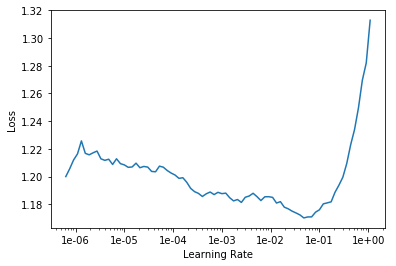

In [119]:
learn.lr_find()
learn.recorder.plot()

In [204]:
learn.fit_one_cycle(10, 5e-4, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.147231,1.028057,0.500000,00:01
1,1.127423,1.065793,0.500000,00:01
2,1.110642,1.118239,0.400000,00:01
3,1.087618,0.958674,0.500000,00:01
4,1.072000,1.023967,0.400000,00:01
5,1.053369,0.977363,0.550000,00:01
6,1.036954,1.031826,0.400000,00:01
7,1.019894,1.008522,0.500000,00:01
8,1.000552,1.000749,0.500000,00:01
9,0.989004,0.995863,0.550000,00:01


In [120]:
x = 0
for i in val_rng:
    dta = data_lmx.iloc[i]
    pred = learn.predict(dta)
    pred = pred[2]
    preds = []
    for j in range(3):
        preds.append((pred[j].item(), j))
    preds.sort(reverse = True)
    #print(preds)
    if(preds[0][1] == dta.RES or preds[1][1] == dta.RES): x+=1
    
print(x, '/', len(val_rng))
x/len(val_rng)

16 / 20


0.8

##### Fine tunning

In [49]:
data_separated[0].tail()

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
329,fc juarez,tigres,19.0,2019,apertura,16.0,17.0,0.294118,0.176471,0.529412,...,5.0,17.0,0.411765,0.470588,0.117647,1.411765,0.764706,0.647059,1.705882,0
330,morelia,leon,20.0,2019,apertura,7.0,18.0,0.444444,0.166667,0.388889,...,2.0,18.0,0.500000,0.333333,0.166667,2.111111,1.277778,0.833333,1.833333,1
331,necaxa,queretaro,20.0,2019,apertura,5.0,18.0,0.500000,0.222222,0.277778,...,4.0,18.0,0.500000,0.222222,0.277778,1.722222,1.055556,0.666667,1.722222,2
332,monterrey,santos,20.0,2019,apertura,8.0,18.0,0.444444,0.166667,0.388889,...,1.0,18.0,0.611111,0.222222,0.166667,2.222222,1.388889,0.833333,2.055556,2
333,america,tigres,20.0,2019,apertura,6.0,18.0,0.444444,0.388889,0.166667,...,3.0,18.0,0.444444,0.444444,0.111111,1.444444,0.777778,0.666667,1.777778,0


In [101]:
sub_data = data_separated[7]

val_rng = range(len(sub_data)-20, len(sub_data))

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(val_rng)
   .label_from_df(cols=deep_vars)
   .databunch(bs=30))
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


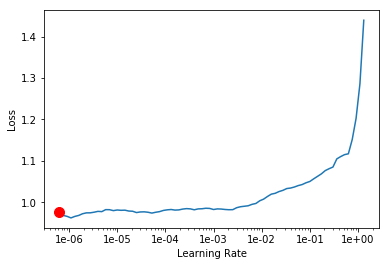

In [111]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [114]:
learn.fit(20, 10e-07, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.973602,0.968121,0.500000,00:01
1,0.975370,0.971408,0.500000,00:01
2,0.971626,0.974952,0.450000,00:01
3,0.976100,0.975527,0.450000,00:01
4,0.979045,0.970514,0.500000,00:01
5,0.980128,0.968221,0.550000,00:00
6,0.977399,0.962611,0.500000,00:01
7,0.978951,0.967452,0.500000,00:00
8,0.977689,0.972395,0.500000,00:00
9,0.977711,0.975047,0.500000,00:01


In [246]:
len(data_lmx.columns)

24

In [91]:
x = 0
for i in val_rng:
    dta = data_lmx.iloc[i]
    pred = learn.predict(dta)
    pred = pred[2]
    preds = []
    for j in range(3):
        preds.append((pred[j].item(), j))
    preds.sort(reverse = True)
    #print(preds)
    if(preds[0][1] == dta.RES or preds[1][1] == dta.RES): x+=1
    
print(x, '/', len(val_rng))
x/len(val_rng)

16 / 20


0.8

correct:  0


(Category 2, tensor(2), tensor([0.2422, 0.3415, 0.4163]))

In [26]:
data_lmx.iloc[3]

LOC            pachuca
VIS               leon
JRD                  1
ANO               2019
TIPO          apertura
L_POS                0
L_JJ                 0
L_R_JG_JJ            0
L_R_JE_JJ            0
L_R_JP_JJ            0
L_R_GF_JJ            0
L_R_GC_JJ            0
L_R_DIF_JJ           0
L_R_PTS_JJ           0
V_POS                0
V_JJ                 0
V_R_JG_JJ            0
V_R_JE_JJ            0
V_R_JP_JJ            0
V_R_GF_JJ            0
V_R_GC_JJ            0
V_R_DIF_JJ           0
V_R_PTS_JJ           0
RES                  0
Name: 3, dtype: object

In [34]:
ttltie = 0
for i in  range(100):
    pred = learn.predict(data_lmx.iloc[i])
    if pred[1].item() == 2: 
        ttltie +=1
ttltie

41

In [ ]:
sub_data = data_separated[7]

val_rng = range(len(sub_data)-20, len(sub_data))

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(val_rng)
   .label_from_df(cols=deep_vars)
   .databunch(bs=30))
learn.data = data

In [ ]:
learn.lr_find()
learn.recorder.plot(suggetion=True)

#### Data Separated

In [41]:
data_separated = []
for i in range(2012, 2020):
    data_separated.append(pd.concat([data_lmx[data_lmx.ANO == i][data_lmx.TIPO == 'clausura'], data_lmx[data_lmx.ANO == i][data_lmx.TIPO == 'apertura']]))
    
    
val_rng = range(155, 175)

for i, df in enumerate(data_separated):
    if i < 7: data_separated[i] = (pd.concat([df, data_lmx.iloc[val_rng]]))
    data_separated[i].reset_index(drop=True, inplace=True)
data_separated[0].tail()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
329,fc juarez,tigres,19.0,2019,apertura,16.0,17.0,0.294118,0.176471,0.529412,...,0.411765,0.470588,0.117647,1.411765,0.764706,0.647059,1.705882,0,True,False
330,morelia,leon,20.0,2019,apertura,7.0,18.0,0.444444,0.166667,0.388889,...,0.500000,0.333333,0.166667,2.111111,1.277778,0.833333,1.833333,1,True,False
331,necaxa,queretaro,20.0,2019,apertura,5.0,18.0,0.500000,0.222222,0.277778,...,0.500000,0.222222,0.277778,1.722222,1.055556,0.666667,1.722222,2,True,False
332,monterrey,santos,20.0,2019,apertura,8.0,18.0,0.444444,0.166667,0.388889,...,0.611111,0.222222,0.166667,2.222222,1.388889,0.833333,2.055556,2,True,False
333,america,tigres,20.0,2019,apertura,6.0,18.0,0.444444,0.388889,0.166667,...,0.444444,0.444444,0.111111,1.444444,0.777778,0.666667,1.777778,0,True,False


In [26]:
sz = len(data_separated[7])
data_separated[7].iloc[range(sz-20, sz-19)]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
312,tijuana,monterrey,18.0,2019,apertura,8.0,16.0,0.4375,0.1875,0.375,...,11.0,16.0,0.375,0.1875,0.4375,1.3125,1.4375,-0.125,1.3125,0


In [27]:
deep_vars = ['RES']
#categorical values
cat_names = ['LOC', 'VIS', 'JRD', 'ANO', 'TIPO']
#continious variables
cont_names = ['L_JJ', 'L_POS', 'V_POS',
       'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ',
       'L_R_DIF_JJ', 'L_R_PTS_JJ', 'V_JJ', 'V_R_JG_JJ', 'V_R_JE_JJ',
       'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

In [33]:
def train_data_separated():
    print('--------------------------')
    sub_data = data_separated[7]

    val_rng = range(len(sub_data)-20, len(sub_data))

    data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
           .split_by_idx(list(val_rng))
           .label_from_df(cols=deep_vars)
           .databunch(bs = 30))

    learn = tabular_learner(data, layers=[500, 200, 100],  ps=[0.1, 0.01, 0.1], emb_drop=0.1, metrics=accuracy)

    x = [10, 10, 10, 10, 10, 20, 20, 20, 20]
    lrs = [1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4, 1e-4]

    for i, sub_data in enumerate(data_separated):

        lst = len(sub_data)

        val_rng = range(lst-20, lst)

        data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
           .split_by_idx(list(val_rng))
           .label_from_df(cols=deep_vars)
           .databunch(bs=30))
        learn.data = data

        print(learn.fit(x[i], lrs[i], wd=0.2))
        print('\n\n')

In [34]:
for i in range(10):
    train_data_separated()

--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.176042,1.086480,0.400000,00:00
1,1.138275,1.070402,0.350000,00:00
2,1.106757,1.078031,0.350000,00:00
3,1.074362,1.110948,0.350000,00:00
4,1.060372,1.135201,0.350000,00:00
5,1.039464,1.145944,0.350000,00:00
6,1.023563,1.167036,0.400000,00:00
7,1.010285,1.180320,0.400000,00:00
8,0.992731,1.197345,0.450000,00:00
9,0.984321,1.179875,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.184762,1.166720,0.500000,00:00
1,1.177928,1.176242,0.500000,00:00
2,1.151166,1.155121,0.500000,00:00
3,1.125382,1.176890,0.500000,00:00
4,1.098982,1.162703,0.500000,00:00
5,1.077226,1.177728,0.450000,00:00
6,1.055991,1.181759,0.500000,00:00
7,1.039857,1.172143,0.450000,00:00
8,1.032958,1.161910,0.550000,00:00
9,1.016428,1.135581,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.221425,1.127591,0.400000,00:00
1,1.191718,1.124207,0.400000,00:00
2,1.146222,1.118390,0.350000,00:00
3,1.117509,1.133070,0.300000,00:00
4,1.098634,1.125953,0.300000,00:00
5,1.073555,1.103774,0.450000,00:00
6,1.057641,1.097728,0.400000,00:00
7,1.041582,1.088516,0.400000,00:00
8,1.031193,1.105971,0.250000,00:00
9,1.012541,1.092976,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.139114,1.101658,0.250000,00:00
1,1.141371,1.122194,0.250000,00:00
2,1.121101,1.142902,0.250000,00:00
3,1.096028,1.142244,0.250000,00:00
4,1.075673,1.141913,0.250000,00:00
5,1.059424,1.133949,0.250000,00:00
6,1.046643,1.155354,0.250000,00:00
7,1.025788,1.166012,0.250000,00:00
8,1.011997,1.177622,0.250000,00:00
9,1.002534,1.142289,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.210251,1.229239,0.400000,00:00
1,1.155869,1.206896,0.400000,00:00
2,1.111631,1.169880,0.450000,00:00
3,1.093009,1.170480,0.450000,00:00
4,1.070407,1.158964,0.450000,00:00
5,1.057783,1.149318,0.400000,00:00
6,1.034811,1.142329,0.400000,00:00
7,1.020663,1.130533,0.500000,00:00
8,1.005363,1.128093,0.500000,00:00
9,0.996225,1.146284,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.186539,1.096889,0.350000,00:00
1,1.141714,1.074478,0.350000,00:00
2,1.117890,1.086245,0.300000,00:00
3,1.105825,1.115094,0.350000,00:00
4,1.084820,1.129405,0.350000,00:00
5,1.061276,1.137845,0.350000,00:00
6,1.046497,1.138672,0.400000,00:00
7,1.030753,1.138228,0.400000,00:00
8,1.022815,1.127109,0.350000,00:00
9,1.006431,1.126217,0.250000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.221936,1.093675,0.400000,00:00
1,1.188165,1.088993,0.450000,00:00
2,1.156278,1.100878,0.400000,00:00
3,1.131142,1.118550,0.400000,00:00
4,1.102338,1.120067,0.400000,00:00
5,1.079460,1.133997,0.400000,00:00
6,1.054377,1.107795,0.450000,00:00
7,1.037353,1.066503,0.450000,00:00
8,1.023806,1.097616,0.350000,00:00
9,1.004379,1.100006,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.106999,0.998668,0.350000,00:00
1,1.087615,0.983872,0.350000,00:00
2,1.071140,0.974236,0.450000,00:00
3,1.043637,0.956340,0.600000,00:00
4,1.035739,0.966301,0.550000,00:00
5,1.016088,0.965994,0.550000,00:00
6,0.999986,0.964193,0.600000,00:00
7,0.986277,0.950545,0.600000,00:00
8,0.971809,0.969723,0.600000,00:00
9,0.957405,0.981698,0.600000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.153492,1.096261,0.250000,00:00
1,1.106520,1.081406,0.450000,00:00
2,1.074468,1.072342,0.500000,00:00
3,1.067056,1.086556,0.500000,00:00
4,1.045214,1.153875,0.450000,00:00
5,1.026242,1.184075,0.450000,00:00
6,1.006568,1.191188,0.450000,00:00
7,0.988540,1.219062,0.450000,00:00
8,0.981108,1.210537,0.450000,00:00
9,0.963801,1.244267,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.154355,1.212082,0.450000,00:00
1,1.149657,1.251088,0.450000,00:00
2,1.142652,1.242263,0.450000,00:00
3,1.119813,1.187698,0.450000,00:00
4,1.092307,1.146710,0.500000,00:00
5,1.071903,1.114630,0.500000,00:00
6,1.044161,1.092774,0.450000,00:00
7,1.026526,1.083811,0.500000,00:00
8,1.017897,1.073650,0.500000,00:00
9,0.995821,1.096505,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.214476,1.091867,0.550000,00:00
1,1.184489,1.074010,0.550000,00:00
2,1.143421,1.071140,0.450000,00:00
3,1.126547,1.066300,0.450000,00:00
4,1.100332,1.064280,0.400000,00:00
5,1.077273,1.069125,0.400000,00:00
6,1.051452,1.072591,0.450000,00:00
7,1.028738,1.081833,0.350000,00:00
8,1.012928,1.090465,0.450000,00:00
9,1.002188,1.103170,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.176862,1.137515,0.350000,00:00
1,1.152543,1.137469,0.200000,00:00
2,1.133193,1.146113,0.200000,00:00
3,1.103937,1.150454,0.200000,00:00
4,1.075147,1.113868,0.300000,00:00
5,1.047442,1.101788,0.300000,00:00
6,1.039097,1.101663,0.250000,00:00
7,1.021976,1.109723,0.250000,00:00
8,1.006513,1.107571,0.250000,00:00
9,0.994626,1.087443,0.250000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.219027,1.140507,0.350000,00:00
1,1.153206,1.121041,0.350000,00:00
2,1.123224,1.105466,0.450000,00:00
3,1.090455,1.107580,0.500000,00:00
4,1.073830,1.142815,0.500000,00:00
5,1.056526,1.170321,0.450000,00:00
6,1.040327,1.167202,0.450000,00:00
7,1.020814,1.148221,0.450000,00:00
8,1.006668,1.165910,0.450000,00:00
9,0.992453,1.186636,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.179738,1.151497,0.400000,00:00
1,1.171810,1.147364,0.350000,00:00
2,1.135087,1.119801,0.350000,00:00
3,1.103699,1.128267,0.400000,00:00
4,1.078153,1.135682,0.350000,00:00
5,1.063201,1.134859,0.350000,00:00
6,1.044010,1.144498,0.300000,00:00
7,1.020228,1.169014,0.300000,00:00
8,1.007453,1.170532,0.300000,00:00
9,0.995687,1.177400,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.194324,1.196419,0.350000,00:00
1,1.162839,1.164288,0.400000,00:00
2,1.129557,1.149826,0.400000,00:00
3,1.117647,1.128443,0.450000,00:00
4,1.091243,1.140129,0.400000,00:00
5,1.072414,1.126441,0.400000,00:00
6,1.046193,1.124002,0.400000,00:00
7,1.027431,1.121539,0.400000,00:00
8,1.010752,1.123733,0.350000,00:00
9,0.996028,1.111420,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.165442,1.058991,0.300000,00:00
1,1.158084,1.011144,0.350000,00:00
2,1.132905,0.988424,0.250000,00:00
3,1.111177,0.967719,0.500000,00:00
4,1.079440,0.962540,0.500000,00:00
5,1.058502,0.970948,0.500000,00:00
6,1.037882,0.981688,0.500000,00:00
7,1.020048,0.987422,0.400000,00:00
8,1.001417,0.981896,0.500000,00:00
9,0.983875,0.978688,0.500000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.214118,1.062256,0.550000,00:00
1,1.128078,1.039004,0.500000,00:00
2,1.104962,1.057208,0.400000,00:00
3,1.066185,1.124416,0.400000,00:00
4,1.053998,1.154617,0.400000,00:00
5,1.040119,1.210100,0.400000,00:00
6,1.018890,1.217499,0.400000,00:00
7,1.003826,1.291116,0.400000,00:00
8,0.985113,1.288156,0.450000,00:00
9,0.972279,1.286434,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.227934,1.247511,0.450000,00:00
1,1.190939,1.272174,0.450000,00:00
2,1.148229,1.257793,0.400000,00:00
3,1.121320,1.257188,0.450000,00:00
4,1.098301,1.226648,0.450000,00:00
5,1.073281,1.247458,0.450000,00:00
6,1.062560,1.232506,0.450000,00:00
7,1.042326,1.200323,0.450000,00:00
8,1.026154,1.187022,0.450000,00:00
9,1.017914,1.193656,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.184432,1.187359,0.450000,00:00
1,1.157250,1.141043,0.350000,00:00
2,1.129820,1.158213,0.300000,00:00
3,1.101160,1.134515,0.350000,00:00
4,1.073993,1.122659,0.250000,00:00
5,1.049796,1.128510,0.250000,00:00
6,1.034465,1.116009,0.350000,00:00
7,1.012515,1.087426,0.400000,00:00
8,0.998416,1.086875,0.450000,00:00
9,0.983903,1.122022,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.167598,1.125095,0.350000,00:00
1,1.142612,1.149155,0.200000,00:00
2,1.121011,1.198428,0.300000,00:00
3,1.093136,1.174253,0.300000,00:00
4,1.069246,1.140632,0.300000,00:00
5,1.048822,1.140798,0.250000,00:00
6,1.025476,1.143048,0.300000,00:00
7,1.005423,1.143786,0.350000,00:00
8,0.990609,1.146204,0.400000,00:00
9,0.970201,1.166029,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.191906,1.208585,0.250000,00:00
1,1.169006,1.167346,0.350000,00:00
2,1.115205,1.141938,0.350000,00:00
3,1.089953,1.154060,0.350000,00:00
4,1.058974,1.136672,0.350000,00:00
5,1.049491,1.167982,0.350000,00:00
6,1.028043,1.190941,0.350000,00:00
7,1.014581,1.190849,0.300000,00:00
8,0.999052,1.188202,0.300000,00:00
9,0.992806,1.197244,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.155497,1.168868,0.300000,00:00
1,1.143987,1.191387,0.250000,00:00
2,1.112452,1.171857,0.200000,00:00
3,1.087478,1.168199,0.200000,00:00
4,1.065564,1.169754,0.200000,00:00
5,1.048688,1.188387,0.200000,00:00
6,1.028748,1.173230,0.250000,00:00
7,1.017125,1.198707,0.250000,00:00
8,1.001876,1.201365,0.250000,00:00
9,0.993430,1.186572,0.250000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.175669,1.115442,0.450000,00:00
1,1.149973,1.098366,0.350000,00:00
2,1.134557,1.113483,0.400000,00:00
3,1.120894,1.116593,0.350000,00:00
4,1.097480,1.101931,0.350000,00:00
5,1.082769,1.119164,0.400000,00:00
6,1.053488,1.127022,0.400000,00:00
7,1.038310,1.122711,0.350000,00:00
8,1.021688,1.074165,0.400000,00:00
9,1.010037,1.061810,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.125520,1.033928,0.350000,00:00
1,1.117081,0.997281,0.350000,00:00
2,1.094157,0.962768,0.500000,00:00
3,1.068145,0.962811,0.550000,00:00
4,1.048894,0.955898,0.550000,00:00
5,1.021678,0.949799,0.550000,00:00
6,0.998692,0.931429,0.650000,00:00
7,0.980401,0.942639,0.650000,00:00
8,0.964278,0.948342,0.600000,00:00
9,0.955119,0.948748,0.650000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.173020,1.075870,0.500000,00:00
1,1.134929,1.052204,0.550000,00:00
2,1.098231,1.032892,0.600000,00:00
3,1.059430,1.033721,0.600000,00:00
4,1.044656,1.030659,0.550000,00:00
5,1.034500,1.039806,0.550000,00:00
6,1.009594,1.102910,0.400000,00:00
7,0.994309,1.137822,0.400000,00:00
8,0.979290,1.173783,0.450000,00:00
9,0.965786,1.193570,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.156576,1.140107,0.450000,00:00
1,1.145246,1.129925,0.550000,00:00
2,1.121322,1.095173,0.550000,00:00
3,1.101076,1.090665,0.550000,00:00
4,1.080990,1.090861,0.550000,00:00
5,1.058648,1.086265,0.550000,00:00
6,1.039150,1.117317,0.550000,00:00
7,1.023567,1.126389,0.550000,00:00
8,1.015022,1.174412,0.500000,00:00
9,0.993949,1.134489,0.550000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.187631,1.120013,0.450000,00:00
1,1.167481,1.080229,0.500000,00:00
2,1.136100,1.093805,0.450000,00:00
3,1.107512,1.088732,0.450000,00:00
4,1.082656,1.090267,0.500000,00:00
5,1.051169,1.079670,0.450000,00:00
6,1.035611,1.081924,0.400000,00:00
7,1.015076,1.066238,0.500000,00:00
8,1.002152,1.066549,0.500000,00:00
9,0.990508,1.054913,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.165449,1.086768,0.500000,00:00
1,1.146637,1.119438,0.300000,00:00
2,1.117210,1.117334,0.300000,00:00
3,1.093951,1.106881,0.300000,00:00
4,1.074868,1.099497,0.350000,00:00
5,1.055161,1.101380,0.400000,00:00
6,1.029204,1.092231,0.400000,00:00
7,1.018068,1.112642,0.350000,00:00
8,0.997192,1.122239,0.450000,00:00
9,0.982585,1.129835,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.228739,1.197181,0.350000,00:00
1,1.167817,1.181997,0.350000,00:00
2,1.136203,1.209090,0.450000,00:00
3,1.104496,1.183449,0.400000,00:00
4,1.083873,1.134278,0.450000,00:00
5,1.058522,1.102627,0.500000,00:00
6,1.042331,1.121642,0.450000,00:00
7,1.023140,1.135081,0.400000,00:00
8,1.010207,1.150269,0.350000,00:00
9,0.996715,1.170310,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.136401,1.127961,0.250000,00:00
1,1.127154,1.124646,0.250000,00:00
2,1.116163,1.098471,0.150000,00:00
3,1.099828,1.081826,0.250000,00:00
4,1.083309,1.060106,0.300000,00:00
5,1.062228,1.044659,0.350000,00:00
6,1.045700,1.056240,0.400000,00:00
7,1.028605,1.063828,0.400000,00:00
8,1.012054,1.080234,0.400000,00:00
9,0.997721,1.074876,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.171527,1.191314,0.300000,00:00
1,1.170968,1.180544,0.300000,00:00
2,1.156707,1.171057,0.300000,00:00
3,1.133062,1.126341,0.400000,00:00
4,1.109747,1.080999,0.400000,00:00
5,1.087620,1.046998,0.400000,00:00
6,1.065180,1.031922,0.450000,00:00
7,1.039184,1.029318,0.450000,00:00
8,1.015789,1.027452,0.500000,00:00
9,0.998496,1.033338,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.136295,1.028850,0.400000,00:00
1,1.107157,1.012008,0.450000,00:00
2,1.082385,0.977433,0.450000,00:00
3,1.060591,0.976302,0.500000,00:00
4,1.037871,0.980566,0.550000,00:00
5,1.018577,0.976738,0.500000,00:00
6,1.000136,0.975029,0.500000,00:00
7,0.978255,0.981999,0.550000,00:00
8,0.958863,0.987104,0.550000,00:00
9,0.941631,1.008570,0.500000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.195883,1.100968,0.250000,00:00
1,1.147287,1.122314,0.200000,00:00
2,1.107017,1.131893,0.350000,00:00
3,1.072365,1.175512,0.400000,00:00
4,1.053135,1.208419,0.450000,00:00
5,1.023774,1.261579,0.350000,00:00
6,1.010287,1.295522,0.350000,00:00
7,0.996612,1.261793,0.350000,00:00
8,0.976056,1.209189,0.500000,00:00
9,0.960036,1.215788,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.165867,1.163662,0.550000,00:00
1,1.160042,1.179774,0.550000,00:00
2,1.137654,1.178375,0.550000,00:00
3,1.112612,1.178843,0.550000,00:00
4,1.096114,1.148205,0.550000,00:00
5,1.072451,1.169338,0.500000,00:00
6,1.058761,1.183906,0.500000,00:00
7,1.035891,1.204013,0.500000,00:00
8,1.024090,1.185740,0.450000,00:00
9,1.005673,1.203127,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.222756,1.261278,0.400000,00:00
1,1.178787,1.240397,0.250000,00:00
2,1.132618,1.195031,0.250000,00:00
3,1.107000,1.176986,0.250000,00:00
4,1.078617,1.176922,0.250000,00:00
5,1.059251,1.192356,0.200000,00:00
6,1.040634,1.197880,0.200000,00:00
7,1.018777,1.185987,0.300000,00:00
8,1.001809,1.172021,0.350000,00:00
9,0.989744,1.198233,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.213871,1.197884,0.350000,00:00
1,1.181897,1.243905,0.250000,00:00
2,1.145181,1.264362,0.250000,00:00
3,1.113878,1.251893,0.250000,00:00
4,1.081058,1.208583,0.250000,00:00
5,1.055817,1.187991,0.200000,00:00
6,1.041084,1.184362,0.250000,00:00
7,1.019372,1.171117,0.350000,00:00
8,1.003510,1.145752,0.350000,00:00
9,0.983061,1.148665,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.216508,1.180102,0.300000,00:00
1,1.182393,1.103798,0.350000,00:00
2,1.146461,1.073107,0.500000,00:00
3,1.112015,1.086163,0.500000,00:00
4,1.089345,1.095048,0.500000,00:00
5,1.069567,1.108132,0.400000,00:00
6,1.047258,1.100337,0.500000,00:00
7,1.026747,1.095783,0.500000,00:00
8,1.011747,1.093119,0.450000,00:00
9,0.992024,1.080793,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.168159,1.071141,0.350000,00:00
1,1.157683,1.070600,0.300000,00:00
2,1.106877,1.081822,0.350000,00:00
3,1.088192,1.081805,0.300000,00:00
4,1.066634,1.076598,0.250000,00:00
5,1.056991,1.084023,0.300000,00:00
6,1.041674,1.067645,0.450000,00:00
7,1.026612,1.064528,0.500000,00:00
8,1.004350,1.068370,0.550000,00:00
9,0.993431,1.068222,0.550000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.203153,1.090169,0.400000,00:00
1,1.162183,1.081511,0.400000,00:00
2,1.126627,1.074350,0.450000,00:00
3,1.102777,1.076098,0.500000,00:00
4,1.082973,1.072625,0.550000,00:00
5,1.067813,1.053496,0.550000,00:00
6,1.043615,1.024885,0.550000,00:00
7,1.028697,1.040352,0.500000,00:00
8,1.005315,1.026430,0.500000,00:00
9,0.982984,1.025730,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.177763,0.989065,0.350000,00:00
1,1.136894,0.953957,0.400000,00:00
2,1.102432,0.951457,0.500000,00:00
3,1.073352,0.943669,0.550000,00:00
4,1.046048,0.961649,0.500000,00:00
5,1.023376,0.941084,0.500000,00:00
6,1.004025,0.945524,0.500000,00:00
7,0.993323,0.958722,0.500000,00:00
8,0.973010,0.955497,0.500000,00:00
9,0.956534,0.929670,0.650000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.176661,1.089454,0.200000,00:00
1,1.127092,1.046426,0.500000,00:00
2,1.095198,1.026446,0.550000,00:00
3,1.067219,1.024075,0.550000,00:00
4,1.036641,1.081168,0.450000,00:00
5,1.012722,1.120643,0.450000,00:00
6,0.995458,1.110291,0.450000,00:00
7,0.983011,1.122401,0.450000,00:00
8,0.979781,1.153759,0.550000,00:00
9,0.963552,1.155808,0.550000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.232567,1.132521,0.500000,00:00
1,1.180819,1.131021,0.550000,00:00
2,1.160544,1.146132,0.550000,00:00
3,1.128172,1.130367,0.550000,00:00
4,1.098258,1.107053,0.550000,00:00
5,1.077160,1.104452,0.550000,00:00
6,1.051952,1.109719,0.500000,00:00
7,1.043124,1.116358,0.500000,00:00
8,1.026571,1.105885,0.500000,00:00
9,1.017139,1.087449,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.201903,1.165717,0.450000,00:00
1,1.164487,1.204103,0.400000,00:00
2,1.141849,1.247173,0.300000,00:00
3,1.122833,1.256442,0.250000,00:00
4,1.092028,1.201040,0.300000,00:00
5,1.073152,1.196526,0.350000,00:00
6,1.045365,1.150899,0.400000,00:00
7,1.037023,1.138386,0.350000,00:00
8,1.018981,1.126565,0.350000,00:00
9,1.003371,1.117420,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.189761,1.187610,0.300000,00:00
1,1.165908,1.223395,0.350000,00:00
2,1.125769,1.222674,0.200000,00:00
3,1.101337,1.212757,0.250000,00:00
4,1.075629,1.213356,0.250000,00:00
5,1.059732,1.236481,0.300000,00:00
6,1.036249,1.240339,0.200000,00:00
7,1.021649,1.255877,0.250000,00:00
8,1.001474,1.248765,0.300000,00:00
9,0.992731,1.240905,0.150000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.194360,1.224097,0.350000,00:00
1,1.187025,1.194697,0.450000,00:00
2,1.140031,1.162291,0.400000,00:00
3,1.106732,1.120108,0.450000,00:00
4,1.080971,1.091204,0.450000,00:00
5,1.065027,1.140934,0.400000,00:00
6,1.047407,1.176419,0.350000,00:00
7,1.025632,1.193913,0.250000,00:00
8,1.007021,1.185405,0.300000,00:00
9,0.991094,1.158423,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.151290,1.115297,0.250000,00:00
1,1.146165,1.122590,0.250000,00:00
2,1.121252,1.088511,0.250000,00:00
3,1.100204,1.068383,0.300000,00:00
4,1.081101,1.067522,0.250000,00:00
5,1.064255,1.062823,0.250000,00:00
6,1.052576,1.091163,0.250000,00:00
7,1.031240,1.082679,0.300000,00:00
8,1.014420,1.097195,0.300000,00:00
9,1.005909,1.081168,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.188983,1.117806,0.450000,00:00
1,1.171379,1.126344,0.450000,00:00
2,1.132408,1.111946,0.450000,00:00
3,1.113053,1.088477,0.400000,00:00
4,1.088133,1.089106,0.450000,00:00
5,1.067456,1.067359,0.500000,00:00
6,1.045158,1.059622,0.450000,00:00
7,1.026613,1.045846,0.450000,00:00
8,1.007610,1.062546,0.450000,00:00
9,0.992721,1.046448,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.139394,1.018432,0.450000,00:00
1,1.116040,0.983909,0.500000,00:00
2,1.082497,0.971245,0.500000,00:00
3,1.061363,0.990472,0.450000,00:00
4,1.028791,1.009319,0.500000,00:00
5,1.016505,1.056061,0.450000,00:00
6,0.999281,1.073532,0.400000,00:00
7,0.984724,1.062872,0.450000,00:00
8,0.969624,1.054439,0.450000,00:00
9,0.957857,1.061366,0.450000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.192496,1.101219,0.250000,00:00
1,1.146024,1.081875,0.350000,00:00
2,1.113405,1.069512,0.400000,00:00
3,1.080357,1.089556,0.450000,00:00
4,1.056386,1.110802,0.550000,00:00
5,1.046853,1.119582,0.500000,00:00
6,1.019991,1.126695,0.500000,00:00
7,1.003930,1.124615,0.500000,00:00
8,0.990378,1.171971,0.450000,00:00
9,0.980401,1.141485,0.600000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.192256,1.110442,0.600000,00:00
1,1.150241,1.134907,0.450000,00:00
2,1.129583,1.162170,0.450000,00:00
3,1.105628,1.164621,0.450000,00:00
4,1.086305,1.150882,0.500000,00:00
5,1.062348,1.164019,0.500000,00:00
6,1.045919,1.136159,0.400000,00:00
7,1.036109,1.102788,0.450000,00:00
8,1.016675,1.097257,0.350000,00:00
9,1.000696,1.088773,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.226379,1.180347,0.400000,00:00
1,1.169314,1.193869,0.450000,00:00
2,1.133138,1.209557,0.400000,00:00
3,1.100479,1.201193,0.400000,00:00
4,1.078889,1.174354,0.400000,00:00
5,1.060862,1.197926,0.300000,00:00
6,1.039794,1.193033,0.300000,00:00
7,1.017048,1.149115,0.400000,00:00
8,1.000551,1.145816,0.350000,00:00
9,0.988027,1.124810,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.185001,1.148593,0.350000,00:00
1,1.169655,1.148597,0.300000,00:00
2,1.130496,1.186527,0.300000,00:00
3,1.098924,1.158334,0.300000,00:00
4,1.082530,1.151266,0.300000,00:00
5,1.072523,1.142427,0.300000,00:00
6,1.057308,1.168058,0.300000,00:00
7,1.036214,1.179031,0.250000,00:00
8,1.017448,1.216201,0.250000,00:00
9,1.002521,1.216444,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.237357,1.174823,0.450000,00:00
1,1.181770,1.163144,0.400000,00:00
2,1.134333,1.172056,0.350000,00:00
3,1.108562,1.197968,0.350000,00:00
4,1.089153,1.245679,0.300000,00:00
5,1.065337,1.237259,0.250000,00:00
6,1.045927,1.224558,0.250000,00:00
7,1.027997,1.245061,0.200000,00:00
8,1.012374,1.268172,0.150000,00:00
9,0.995687,1.270331,0.150000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.191084,1.243119,0.150000,00:00
1,1.163482,1.209393,0.150000,00:00
2,1.126683,1.233616,0.150000,00:00
3,1.105159,1.204315,0.150000,00:00
4,1.087709,1.177271,0.250000,00:00
5,1.070903,1.157757,0.200000,00:00
6,1.053010,1.156525,0.200000,00:00
7,1.030706,1.134666,0.250000,00:00
8,1.022766,1.141001,0.300000,00:00
9,1.008411,1.137554,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.170396,1.072402,0.450000,00:00
1,1.153793,1.110179,0.350000,00:00
2,1.138547,1.121498,0.400000,00:00
3,1.119062,1.127792,0.350000,00:00
4,1.098536,1.106757,0.350000,00:00
5,1.072433,1.085950,0.400000,00:00
6,1.049006,1.063750,0.350000,00:00
7,1.032026,1.046331,0.400000,00:00
8,1.012340,1.049692,0.400000,00:00
9,0.995516,1.049637,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.160513,0.931326,0.450000,00:00
1,1.127245,0.918324,0.500000,00:00
2,1.094432,0.893565,0.600000,00:00
3,1.072585,0.871547,0.600000,00:00
4,1.042214,0.864289,0.600000,00:00
5,1.020080,0.884295,0.600000,00:00
6,0.997754,0.899917,0.600000,00:00
7,0.982660,0.924621,0.600000,00:00
8,0.970221,0.917653,0.600000,00:00
9,0.957063,0.930113,0.550000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.215416,1.110828,0.100000,00:00
1,1.143621,1.067533,0.550000,00:00
2,1.102938,1.050637,0.500000,00:00
3,1.090304,1.059713,0.550000,00:00
4,1.073566,1.113495,0.500000,00:00
5,1.054959,1.217097,0.400000,00:00
6,1.036101,1.218221,0.450000,00:00
7,1.011171,1.210652,0.500000,00:00
8,0.993538,1.283758,0.500000,00:00
9,0.974107,1.322121,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.191444,1.222867,0.500000,00:00
1,1.167996,1.238362,0.500000,00:00
2,1.139050,1.212110,0.500000,00:00
3,1.113375,1.174556,0.500000,00:00
4,1.095966,1.149038,0.500000,00:00
5,1.070093,1.163977,0.500000,00:00
6,1.052522,1.122392,0.500000,00:00
7,1.038167,1.088672,0.500000,00:00
8,1.022449,1.094137,0.500000,00:00
9,1.009271,1.098626,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.171972,1.110629,0.450000,00:00
1,1.135364,1.098536,0.450000,00:00
2,1.117658,1.063454,0.450000,00:00
3,1.092506,1.072188,0.400000,00:00
4,1.071843,1.053598,0.300000,00:00
5,1.054499,1.043267,0.300000,00:00
6,1.039058,1.036220,0.300000,00:00
7,1.020581,1.033831,0.450000,00:00
8,1.006154,1.031223,0.450000,00:00
9,0.988213,1.043191,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.147508,1.171507,0.250000,00:00
1,1.144559,1.188216,0.300000,00:00
2,1.118965,1.168513,0.300000,00:00
3,1.088913,1.148444,0.300000,00:00
4,1.061724,1.114462,0.350000,00:00
5,1.049872,1.106420,0.350000,00:00
6,1.035172,1.120477,0.400000,00:00
7,1.016793,1.124141,0.350000,00:00
8,0.995373,1.122229,0.400000,00:00
9,0.974368,1.114863,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.235678,1.146209,0.450000,00:00
1,1.174707,1.148642,0.350000,00:00
2,1.145249,1.141530,0.450000,00:00
3,1.116295,1.141884,0.450000,00:00
4,1.092440,1.139010,0.450000,00:00
5,1.070488,1.159889,0.400000,00:00
6,1.055197,1.173505,0.350000,00:00
7,1.034783,1.182101,0.350000,00:00
8,1.023291,1.164174,0.300000,00:00
9,1.006567,1.202776,0.250000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.178751,1.153256,0.300000,00:00
1,1.146311,1.144057,0.300000,00:00
2,1.122400,1.148614,0.250000,00:00
3,1.114910,1.111771,0.300000,00:00
4,1.092955,1.122924,0.350000,00:00
5,1.068985,1.114270,0.350000,00:00
6,1.049563,1.109688,0.350000,00:00
7,1.033443,1.120802,0.400000,00:00
8,1.022069,1.106885,0.400000,00:00
9,1.002828,1.110428,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.184611,1.223568,0.450000,00:00
1,1.174839,1.225207,0.350000,00:00
2,1.151635,1.221760,0.350000,00:00
3,1.131225,1.187736,0.400000,00:00
4,1.104944,1.150955,0.450000,00:00
5,1.077069,1.146068,0.450000,00:00
6,1.043821,1.118758,0.450000,00:00
7,1.023213,1.132910,0.350000,00:00
8,1.013436,1.084170,0.400000,00:00
9,0.991368,1.098405,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.159787,1.110167,0.250000,00:00
1,1.158277,1.034841,0.300000,00:00
2,1.112528,1.006686,0.400000,00:00
3,1.083862,0.981238,0.500000,00:00
4,1.064690,0.967712,0.600000,00:00
5,1.050474,0.973481,0.550000,00:00
6,1.027785,0.967308,0.550000,00:00
7,1.006860,0.946107,0.550000,00:00
8,0.991952,0.937796,0.500000,00:00
9,0.980976,0.939441,0.550000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.203190,1.087971,0.450000,00:00
1,1.136007,1.084953,0.450000,00:00
2,1.096442,1.107205,0.500000,00:00
3,1.061465,1.168212,0.500000,00:00
4,1.042537,1.234527,0.550000,00:00
5,1.023149,1.291408,0.450000,00:00
6,1.003077,1.297843,0.500000,00:00
7,0.983182,1.294363,0.500000,00:00
8,0.973832,1.336088,0.500000,00:00
9,0.967461,1.360622,0.500000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.158301,1.278944,0.450000,00:00
1,1.150405,1.259639,0.500000,00:00
2,1.128201,1.308302,0.500000,00:00
3,1.109130,1.310038,0.450000,00:00
4,1.093524,1.256485,0.500000,00:00
5,1.073000,1.210044,0.500000,00:00
6,1.059010,1.200398,0.500000,00:00
7,1.038743,1.191229,0.500000,00:00
8,1.018998,1.209823,0.450000,00:00
9,1.002494,1.199119,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.229281,1.141407,0.400000,00:00
1,1.187162,1.103306,0.400000,00:00
2,1.154171,1.091671,0.400000,00:00
3,1.112581,1.099924,0.500000,00:00
4,1.087664,1.129968,0.550000,00:00
5,1.070505,1.068951,0.500000,00:00
6,1.047973,1.073075,0.500000,00:00
7,1.030009,1.094518,0.550000,00:00
8,1.009733,1.073278,0.550000,00:00
9,0.993329,1.082229,0.550000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.178519,1.180913,0.350000,00:00
1,1.153593,1.134163,0.350000,00:00
2,1.135853,1.142462,0.400000,00:00
3,1.112072,1.137112,0.400000,00:00
4,1.083988,1.103919,0.400000,00:00
5,1.069254,1.099924,0.400000,00:00
6,1.042945,1.125082,0.350000,00:00
7,1.023461,1.149829,0.300000,00:00
8,1.005485,1.145295,0.350000,00:00
9,0.995810,1.127299,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.195713,1.105706,0.350000,00:00
1,1.170888,1.100120,0.350000,00:00
2,1.151906,1.095709,0.350000,00:00
3,1.111591,1.097792,0.400000,00:00
4,1.080779,1.119954,0.400000,00:00
5,1.060056,1.133207,0.400000,00:00
6,1.046282,1.131073,0.400000,00:00
7,1.028600,1.162848,0.450000,00:00
8,1.016082,1.173449,0.450000,00:00
9,0.996260,1.176857,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.192035,1.143088,0.400000,00:00
1,1.168273,1.124501,0.400000,00:00
2,1.148131,1.119473,0.300000,00:00
3,1.127696,1.103195,0.400000,00:00
4,1.093761,1.122754,0.400000,00:00
5,1.069885,1.138633,0.400000,00:00
6,1.055901,1.142016,0.400000,00:00
7,1.034980,1.157050,0.400000,00:00
8,1.015368,1.150274,0.400000,00:00
9,1.003326,1.146875,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.209953,1.143752,0.400000,00:00
1,1.189349,1.087919,0.500000,00:00
2,1.146300,1.081370,0.450000,00:00
3,1.124831,1.064846,0.500000,00:00
4,1.097446,1.057664,0.500000,00:00
5,1.069458,1.061408,0.500000,00:00
6,1.047214,1.064408,0.400000,00:00
7,1.029420,1.064174,0.400000,00:00
8,1.014791,1.073498,0.350000,00:00
9,0.996887,1.095548,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.163183,1.078341,0.300000,00:00
1,1.132511,1.043864,0.350000,00:00
2,1.104541,1.033939,0.350000,00:00
3,1.081192,1.029105,0.400000,00:00
4,1.051380,1.009806,0.500000,00:00
5,1.032664,0.990056,0.500000,00:00
6,1.013188,0.974379,0.550000,00:00
7,1.000085,0.987442,0.650000,00:00
8,0.978925,0.988768,0.600000,00:00
9,0.961923,0.980597,0.600000,00:00


None



--------------------------


epoch,train_loss,valid_loss,accuracy,time
0,1.186309,1.086900,0.500000,00:00
1,1.140630,1.071018,0.550000,00:00
2,1.108773,1.043514,0.550000,00:00
3,1.081828,1.023656,0.500000,00:00
4,1.056054,1.028136,0.550000,00:00
5,1.033329,1.064286,0.400000,00:00
6,1.015551,1.078768,0.400000,00:00
7,0.999144,1.131591,0.350000,00:00
8,0.983878,1.160315,0.350000,00:00
9,0.968055,1.199037,0.350000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.150956,1.224869,0.400000,00:00
1,1.151073,1.210510,0.400000,00:00
2,1.128253,1.192586,0.450000,00:00
3,1.105288,1.164866,0.400000,00:00
4,1.081901,1.162896,0.400000,00:00
5,1.063732,1.166380,0.400000,00:00
6,1.039573,1.152758,0.400000,00:00
7,1.016467,1.153435,0.400000,00:00
8,0.997111,1.178558,0.400000,00:00
9,0.980250,1.183862,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.207842,1.151223,0.350000,00:00
1,1.175020,1.187519,0.400000,00:00
2,1.137666,1.196987,0.300000,00:00
3,1.103678,1.193747,0.250000,00:00
4,1.079683,1.162067,0.300000,00:00
5,1.063591,1.128022,0.300000,00:00
6,1.046106,1.113459,0.300000,00:00
7,1.030754,1.120801,0.350000,00:00
8,1.013918,1.099712,0.400000,00:00
9,0.998435,1.088018,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.197016,1.025616,0.550000,00:00
1,1.153000,1.051484,0.450000,00:00
2,1.130690,1.085980,0.450000,00:00
3,1.103396,1.124034,0.450000,00:00
4,1.080266,1.099031,0.400000,00:00
5,1.067097,1.114778,0.400000,00:00
6,1.041366,1.100939,0.400000,00:00
7,1.015593,1.121062,0.400000,00:00
8,0.996850,1.129265,0.400000,00:00
9,0.982903,1.146538,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.192181,1.244545,0.400000,00:00
1,1.167604,1.171090,0.400000,00:00
2,1.133229,1.144207,0.400000,00:00
3,1.101238,1.143365,0.400000,00:00
4,1.079300,1.140966,0.450000,00:00
5,1.064710,1.143667,0.450000,00:00
6,1.045987,1.134819,0.450000,00:00
7,1.031716,1.150201,0.350000,00:00
8,1.019222,1.147372,0.350000,00:00
9,1.001449,1.182518,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.151717,1.128377,0.350000,00:00
1,1.131512,1.109428,0.300000,00:00
2,1.106201,1.105737,0.350000,00:00
3,1.078272,1.108899,0.300000,00:00
4,1.058718,1.084189,0.350000,00:00
5,1.043414,1.075804,0.450000,00:00
6,1.027653,1.082372,0.400000,00:00
7,1.019903,1.080853,0.350000,00:00
8,1.005546,1.103258,0.350000,00:00
9,0.985990,1.107460,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.244374,1.170272,0.400000,00:00
1,1.183526,1.167311,0.350000,00:00
2,1.152599,1.162412,0.450000,00:00
3,1.126202,1.154217,0.450000,00:00
4,1.105085,1.136865,0.450000,00:00
5,1.080331,1.116203,0.450000,00:00
6,1.060565,1.119067,0.400000,00:00
7,1.035334,1.095999,0.400000,00:00
8,1.013396,1.074194,0.400000,00:00
9,0.998937,1.058760,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.158015,1.046777,0.300000,00:00
1,1.136628,0.985340,0.450000,00:00
2,1.114676,0.962891,0.600000,00:00
3,1.087639,1.008472,0.400000,00:00
4,1.058378,1.003802,0.550000,00:00
5,1.030790,1.028162,0.450000,00:00
6,1.015909,0.996748,0.550000,00:00
7,0.995631,1.025442,0.450000,00:00
8,0.977535,1.015680,0.500000,00:00
9,0.963113,0.991332,0.450000,00:00


None





In [102]:
sub_data_idx = 7

sub_data = data_separated[sub_data_idx]

lst = 0
for j in range(len(data_separated[sub_data_idx])):
    if sub_data.iloc[j].TIPO == 'clausura':
        lst = j
        break

val_rng = range(lst-30, lst)

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(val_rng))
       .label_from_df(cols=deep_vars)
       .databunch(bs = 30))

learn = tabular_learner(data, layers=[1200, 600, 200], emb_szs={'LOC':500, 'VIS':500}, metrics=accuracy)

In [113]:
sub_data_idx = 2

sub_data = data_separated[sub_data_idx]

lst = 0
for j in range(len(data_separated[sub_data_idx])):
    if sub_data.iloc[j].TIPO == 'clausura':
        lst = j
        break

val_rng = range(lst-30, lst)

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
       .split_by_idx(list(val_rng))
       .label_from_df(cols=deep_vars)
       .databunch(bs = 30))

learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-04
Min loss divided by 10: 3.98E-03


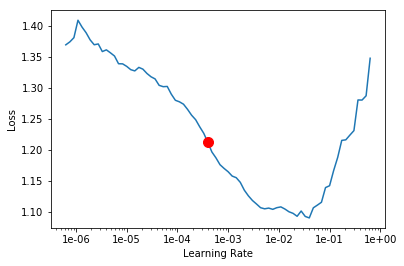

In [114]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [115]:
learn.fit(5, 5e-4)

epoch,train_loss,valid_loss,accuracy,time
0,1.392524,1.352017,0.466667,00:00
1,1.147415,1.342103,0.200000,00:00
2,0.992002,1.298001,0.266667,00:01
3,0.899778,1.356424,0.333333,00:00
4,0.809236,1.330057,0.300000,00:00


In [36]:
valrng = range(134, 175)

x = 0
for i in val_rng:
    dta = data_lmx.iloc[i]
    pred = learn.predict(dta)
    pred = pred[2]
    preds = []
    for j in range(3):
        preds.append((pred[j].item(), j))
    preds.sort(reverse = True)
    #print(preds)
    if(preds[0][1] == dta.RES or preds[1][1] == dta.RES): x+=1
    
print(x, '/', len(val_rng))
x/len(val_rng)

15 / 20


0.75

In [37]:
tr = tensor([0.84, 0.85, 0.82, 0.83, 0.83, 0.84, 0.84, 0.85, 0.84, 0.84])
vl = tensor([1.005, 1.02, 0.97, 1.05, 0.998, 1.06, 0.97, 0.969, 0.96, 1.01])

In [39]:
tr.mean(), tr.std()

(tensor(0.8380), tensor(0.0092))

In [40]:
vl.mean(), vl.std()

(tensor(1.0012), tensor(0.0349))

### Save data

In [664]:
! mkdir ./data/ligamx/sep

In [665]:
path = './data/ligamx/sep/'

for i, df in enumerate(data_separated):
    df.to_pickle(path + str(i + 2012))    
    

### Match Pred Model

#### Regular Training

In [123]:
TabularModel??

In [136]:
class MatchTabularModel(nn.Module):
    "Basic model for match tabular data."
    def __init__(self,
                 #Contestants parameters
                 emb_szs_cts:ListSizes=None, n_cont_cts:int=None, layers_cts:Collection[int]=None, ps_cts:Collection[float]=None, emb_drop_cts:float=0.,
                 #General Data parameters
                 emb_szs_grl:ListSizes=None, n_cont_grl:int=None, layers_grl:Collection[int]=None, ps_grl:Collection[float]=None, emb_drop_grl:float=0.,
                 #General Model parameters
                 use_bn:bool=True, bn_final:bool=False, out_sz:int=None, y_range:OptRange=None):
        super().__init__()
        
        """Contestants Setup -------------------------------------------------------------------------------------"""
        # Dropout probabilities
        ps_cts = ifnone(ps_cts, [0]*len(layers_cts))
        ps_cts = listify(ps_cts, layers_cts)
        
        # Embeddings
        self.embeds_cts = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs_cts])
        self.emb_drop_cts = nn.Dropout(emb_drop_cts)
        n_emb_cts = sum(e.embedding_dim for e in self.embeds_cts)
        
        # Continious (non-embedding)
        self.bn_cont_cts = nn.BatchNorm1d(n_cont_cts)
        
        # Embeddings and Continious
        self.n_emb_cts, self.n_cont_cts = n_emb_cts, n_cont_cts
        sizes_cts = self.get_sizes(n_emb_cts, n_cont_cts, layers_cts)
        actns_cts = [nn.ReLU(inplace=True) for _ in range(len(sizes_cts)-1)]
        layers_cts = []
        for i,(n_in, n_out, dp, act) in enumerate(zip(sizes_cts[:-1], sizes_cts[1:], [0.]+ps_cts, actns_cts)):
            layers_cts += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
        self.layers_cts = layers_cts    
        

        """General Setup -------------------------------------------------------------------------------------"""
        # Dropout Probabilities
        ps_grl = ifnone(ps_grl, [0]*len(layers_grl))
        ps_grl = listify(ps_grl, layers_grl)
        
        # Embeddings
        self.embeds_grl = nn.ModuleList([embedding(ni, nf) for ni,nf in emb_szs_grl])
        self.emb_drop_grl = nn.Dropout(emb_drop_grl)
        n_emb_grl = sum(e.embedding_dim for e in self.embeds_grl)
        
        # Continious (non-embedding)
        print('sizes are: ', sizes_cts[-1])
        n_cont_grl += sizes_cts[-1] # adding output from contestants subnet to the size of the continious input
        self.bn_cont_grl = nn.BatchNorm1d(n_cont_grl)
        
        # Embeddings and Continitous
        self.n_emb_grl, self.n_cont_grl = n_emb_grl, n_cont_grl
        sizes_grl = self.get_sizes(n_emb_grl, n_cont_grl, layers_grl, out_sz)
        actns_grl = [nn.ReLU(inplace=True) for _ in range(len(sizes_grl)-2)] + [None]
        layers_grl = []
        for i,(n_in, n_out, dp, act) in enumerate(zip(sizes_grl[:-1], sizes_grl[1:], [0.]+ps_grl, actns_grl)):
            layers_grl += bn_drop_lin(n_in, n_out, bn=use_bn and i!=0, p=dp, actn=act)
        
        if bn_final: layers_grl.append(nn.BatchNorm1d(sizes_grl[-1]))
        self.layers_grl = nn.Sequential(*layers_grl)
    

        """General Model Setup -------------------------------------------------------------------------------------"""
        self.y_range = y_range

    def get_sizes(self, n_emb, n_cont, layers, out_sz = None):
        res = [n_emb + n_cont] + layers
        return  res + [out_sz] if out_sz is not None else res

    def forward(self, x_cat:Tensor, x_cont:Tensor) -> Tensor:
        contestant_cat = 2
        general_cat = 3
        contestant_cont = 9
        general_cont = 0
        
        # Contestant A
        cat_a:Tensor
        cont_a:Tensor
        # Contestant B
        cat_b:Tensor
        cont_b:Tensor
        # Genearal data
        cat_grl:Tensor
        cont_grl:Tensor
        
        with torch.no_grad():
            cat_a = x_cat[:, :contestant_cat].clone()
            cat_b = x_cat[:, contestant_cat:contestant_cat*2].clone()
            cat_grl = x_cat[:, contestant_cat*2:].clone()
            
            cont_a = x_cont[:, :contestant_cont].clone()
            cont_b = x_cont[:, contestant_cont:contestant_cont*2].clone()
            cont_grl = x_cont[:, contestant_cont*2:].clone()
        
        # Forward of Contestant Layers:
        if self.n_emb_cts != 0:
            a = [e(cat_a[:,i]) for i,e in enumerate(self.embeds_cts)]
            b = [e(cat_a[:,i]) for i,e in enumerate(self.embeds_cts)]
            
            a = torch.cat(a, 1)
            b = torch.cat(b, 1)
            
            # Not very sure about this step, check here and in layers.
            # TODO: implement later: https://discuss.pytorch.org/t/how-to-fix-the-dropout-mask-for-different-batch/7119/3
            #a = a.emb_drop_cts(a)
            #b = b.emb_drop_cts(b)
        
        if self.n_cont_cts != 0:
            # not sure about this step, check here and in layers
            # TODO: check best practice for the batchnorm (use the same normalization for both or not)
            cont_a = self.bn_cont_cts(cont_a)
            cont_b = self.bn_cont_cts(cont_b)
            
            a = torch.cat([a, cont_a], 1) if self.n_emb_cts != 0 else cont_a
            b = torch.cat([b, cont_b], 1) if self.n_emb_cts != 0 else cont_b
            
        for lyr in self.layers_cts:
            a = lyr(a)
            b = lyr(b)
        
        # SUM
        x = a+b
        
        if self.n_cont_grl != 0:
            x = torch.cat([x, cont_grl], 1)
            x = self.bn_cont_grl(x)
        if self.n_emb_grl != 0:
            x_cat = [e(cat_grl[:,i]) for i,e in enumerate(self.embeds_grl)]
            x_cat = torch.cat(x_cat, 1)
            x_cat = self.emb_drop_grl(x_cat)
            x = torch.cat([x, x_cat], 1)
            
        x = self.layers_grl(x)
        if self.y_range is not None:
            x = (self.y_range[1]-self.y_range[0]) * torch.sigmoid(x) + self.y_range[0]
        return x

In [137]:
def match_tabular_learner(
    #Contestants parameters
    layers_cts:Collection[int]=None, emb_szs_cts:Dict[str,int]=None, continious_len_cts:[int]=None, ps_cts:Collection[float]=None, emb_drop_cts:float=0.,
    
    #General parameters
    layers_grl:Collection[int]=None, emb_szs_grl:Dict[str,int]=None, continious_len_grl:[int]=None, ps_grl:Collection[float]=None, emb_drop_grl:float=0.,
    
    #General
    data:DataBunch=None, metrics=None, y_range:OptRange=None, use_bn:bool=True, **learn_kwargs):
    "Get a `Learner` using `data`, with `metrics`, including a `TabularModel` created using the remaining params."
    
    model = MatchTabularModel(
        #Contestants parameters
        emb_szs_cts, continious_len_cts, layers_cts, ps_cts, emb_drop_cts,
        
        #General parameters
        emb_szs_grl, continious_len_grl, layers_grl, ps_grl, emb_drop_grl,
        
        #General
        use_bn, out_sz = data.c, y_range=y_range)
    return Learner(data, model, metrics=metrics, **learn_kwargs)

In [138]:
data_lmx = pd.read_pickle('./data/ligamx/WLT')
data_lmx.head()

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_POS,V_JJ,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES
0,puebla,tijuana,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,atlas,fc juarez,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,atletico de san luis,unam,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,pachuca,leon,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,america,monterrey,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [139]:
data_lmx['L_ES_LOC'] = True
data_lmx['V_ES_LOC'] = False

In [140]:
data_lmx.head()

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
0,puebla,tijuana,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
1,atlas,fc juarez,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,True,False
2,atletico de san luis,unam,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
3,pachuca,leon,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,True,False
4,america,monterrey,1.0,2019,apertura,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,True,False


In [141]:
deep_vars = ['RES']
#categorical values
cat_names = ['LOC', 'L_ES_LOC', 'VIS', 'V_ES_LOC', 'JRD', 'ANO', 'TIPO']
#continious variables
cont_names = ['L_JJ', 'L_POS', 'L_R_JG_JJ', 'L_R_JE_JJ', 'L_R_JP_JJ', 'L_R_GF_JJ', 'L_R_GC_JJ', 'L_R_DIF_JJ', 'L_R_PTS_JJ',
              'V_JJ', 'V_POS', 'V_R_JG_JJ', 'V_R_JE_JJ', 'V_R_JP_JJ', 'V_R_GF_JJ', 'V_R_GC_JJ', 'V_R_DIF_JJ', 'V_R_PTS_JJ']
procs = [Categorify, Normalize]

In [151]:
sub_data = data_lmx

val_rng = range(155, 175)

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(val_rng)
   .label_from_df(cols=deep_vars)
   .databunch(bs=64))
learn = match_tabular_learner([500, 300], [(27, 100), (3, 2)], 9, None, 0.,
                               [200, 100], [(20, 8), (9, 5), (3, 2)], 0, None, 0.,
                               data, metrics=accuracy)

sizes are:  300


In [150]:
len(data_lmx.JRD.unique())

20

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.10E-03


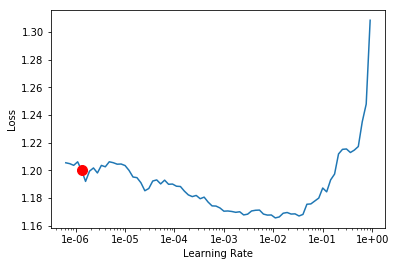

In [152]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [126]:
learn.fit_one_cycle(1, 1e-4, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.149064,1.189012,0.250000,00:02


In [42]:
sub_data = data_separated[7]

val_rng = range(len(sub_data)-20, len(sub_data))

data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
   .split_by_idx(val_rng)
   .label_from_df(cols=deep_vars)
   .databunch(bs=30))
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-02
Min loss divided by 10: 1.91E-03


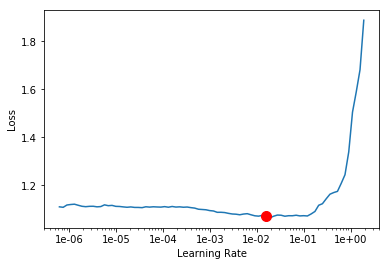

In [43]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [44]:
learn.fit(5,  1e-2, wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.149846,1.196282,0.450000,00:00
1,1.118745,1.249965,0.400000,00:00
2,1.083784,1.118277,0.450000,00:00
3,1.051715,1.136060,0.400000,00:00
4,1.007129,1.265277,0.350000,00:00


In [153]:
val_rng = range(155, 175)

x = 0
for i in val_rng:
    dta = data_lmx.iloc[i]
    pred = learn.predict(dta)
    pred = pred[2]
    preds = []
    for j in range(3):
        preds.append((pred[j].item(), j))
    preds.sort(reverse = True)
    #print(preds)
    if(preds[0][1] == dta.RES or preds[1][1] == dta.RES): x+=1
    
print(x, '/', len(val_rng))
x/len(val_rng)

ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 500])

In [154]:
data_lmx.iloc[range(155, 175)]

,LOC,VIS,JRD,ANO,TIPO,L_POS,L_JJ,L_R_JG_JJ,L_R_JE_JJ,L_R_JP_JJ,...,V_R_JG_JJ,V_R_JE_JJ,V_R_JP_JJ,V_R_GF_JJ,V_R_GC_JJ,V_R_DIF_JJ,V_R_PTS_JJ,RES,L_ES_LOC,V_ES_LOC
155,tijuana,monterrey,18.0,2019,apertura,8.0,16.0,0.437500,0.187500,0.375000,...,0.375000,0.187500,0.437500,1.312500,1.437500,-0.125000,1.312500,0,True,False
156,atletico de san luis,necaxa,18.0,2019,apertura,14.0,16.0,0.375000,0.125000,0.500000,...,0.500000,0.250000,0.250000,1.937500,1.250000,0.687500,1.750000,0,True,False
157,tigres,pachuca,18.0,2019,apertura,4.0,16.0,0.437500,0.437500,0.125000,...,0.375000,0.187500,0.437500,1.875000,1.625000,0.250000,1.312500,1,True,False
158,guadalajara,queretaro,18.0,2019,apertura,15.0,16.0,0.312500,0.250000,0.437500,...,0.500000,0.250000,0.250000,1.625000,0.937500,0.687500,1.750000,2,True,False
159,leon,toluca,18.0,2019,apertura,6.0,16.0,0.437500,0.375000,0.187500,...,0.250000,0.250000,0.500000,0.875000,1.250000,-0.375000,1.000000,2,True,False
160,unam,fc juarez,18.0,2019,apertura,9.0,16.0,0.375000,0.250000,0.375000,...,0.312500,0.125000,0.562500,0.937500,1.500000,-0.562500,1.062500,1,True,False
161,santos,cruz azul,18.0,2019,apertura,1.0,16.0,0.625000,0.187500,0.187500,...,0.250000,0.500000,0.250000,1.312500,1.250000,0.062500,1.250000,2,True,False
162,puebla,necaxa,19.0,2019,apertura,18.0,17.0,0.176471,0.294118,0.529412,...,0.529412,0.235294,0.235294,1.941176,1.176471,0.764706,1.823529,2,True,False
163,tijuana,leon,19.0,2019,apertura,9.0,17.0,0.411765,0.176471,0.411765,...,0.470588,0.352941,0.176471,2.117647,1.294118,0.823529,1.764706,0,True,False
164,queretaro,morelia,19.0,2019,apertura,6.0,17.0,0.470588,0.235294,0.294118,...,0.470588,0.176471,0.352941,1.764706,1.352941,0.411765,1.588235,2,True,False


#### Training separated

In [84]:
def train_data_separated():
    print('--------------------------')
    sub_data = data_separated[7]

    val_rng = range(len(sub_data)-20, len(sub_data))

    data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
           .split_by_idx(list(val_rng))
           .label_from_df(cols=deep_vars)
           .databunch(bs = 30))

    learn = match_tabular_learner([500, 200], [(27, 200)], 9, [0.1, 0.1], 0.1,
                               [200], [(19, 8), (9, 5), (3, 3)], 0, [0.1], 0.1,
                               data, metrics=accuracy)

    x = [10, 10, 10, 10, 10, 20, 20, 20, 20]
    lrs = [1e-5, 1e-4, 1e-3, 1e-3, 1e-3, 1e-4, 1e-5, 1e-6]

    for i, sub_data in enumerate(data_separated):

        lst = len(sub_data)

        val_rng = range(lst-20, lst)

        data = (TabularList.from_df(sub_data, path="./data/ligamx", cat_names=cat_names, cont_names=cont_names, procs=procs)
           .split_by_idx(list(val_rng))
           .label_from_df(cols=deep_vars)
           .databunch(bs=30))
        learn.data = data

        print(learn.fit(x[i], lrs[i], wd=0.2))
        print('\n\n')

In [85]:
train_data_separated()

--------------------------
sizes are:  200


epoch,train_loss,valid_loss,accuracy,time
0,1.228420,1.154918,0.350000,00:00
1,1.244267,1.168000,0.350000,00:00
2,1.240872,1.242250,0.450000,00:00
3,1.217984,1.320013,0.300000,00:00
4,1.225101,1.277989,0.350000,00:00
5,1.225409,1.287803,0.350000,00:00
6,1.214656,1.291553,0.300000,00:00
7,1.204525,1.184855,0.500000,00:00
8,1.202126,1.260290,0.250000,00:00
9,1.193730,1.342982,0.100000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.194104,1.228083,0.350000,00:00
1,1.159397,1.136943,0.450000,00:00
2,1.142712,1.070596,0.450000,00:00
3,1.125090,1.137762,0.400000,00:00
4,1.113867,1.159121,0.400000,00:00
5,1.095598,1.238126,0.350000,00:00
6,1.087092,1.193969,0.450000,00:00
7,1.076419,1.151435,0.400000,00:00
8,1.066223,1.112607,0.450000,00:00
9,1.057856,1.167517,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.201719,1.237346,0.500000,00:00
1,1.136778,1.223760,0.250000,00:00
2,1.083779,1.237411,0.300000,00:00
3,1.044479,1.246941,0.250000,00:00
4,1.003264,1.364524,0.300000,00:00
5,0.959575,1.415871,0.300000,00:00
6,0.934297,1.423828,0.250000,00:00
7,0.908735,1.420516,0.250000,00:00
8,0.880911,1.450937,0.250000,00:00
9,0.852100,1.512866,0.200000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.297671,1.497690,0.200000,00:00
1,1.200894,1.320639,0.250000,00:00
2,1.121523,1.313132,0.250000,00:00
3,1.044487,1.172798,0.300000,00:00
4,0.989295,1.042894,0.450000,00:00
5,0.940870,1.156543,0.500000,00:00
6,0.893841,1.240643,0.350000,00:00
7,0.846139,1.212481,0.450000,00:00
8,0.801212,1.288746,0.400000,00:00
9,0.756085,1.452668,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.375172,1.320592,0.450000,00:00
1,1.248233,1.077093,0.500000,00:00
2,1.154299,0.968619,0.600000,00:00
3,1.079528,0.983277,0.550000,00:00
4,1.022394,0.957544,0.550000,00:00
5,0.984282,1.042389,0.500000,00:00
6,0.940187,0.933175,0.500000,00:00
7,0.896528,0.955976,0.500000,00:00
8,0.861024,1.004110,0.500000,00:00
9,0.835734,1.076560,0.400000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.390369,1.030271,0.500000,00:00
1,1.333669,1.079266,0.500000,00:00
2,1.314778,1.085734,0.500000,00:00
3,1.296464,1.106029,0.500000,00:00
4,1.266404,1.062754,0.450000,00:00
5,1.238375,1.012678,0.450000,00:00
6,1.225673,1.010831,0.550000,00:00
7,1.194345,1.015961,0.500000,00:00
8,1.179964,1.141301,0.450000,00:00
9,1.157784,1.067960,0.450000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.196441,1.097405,0.400000,00:00
1,1.201272,1.066794,0.350000,00:00
2,1.189846,1.049804,0.400000,00:00
3,1.175795,1.186775,0.350000,00:00
4,1.184401,1.075631,0.400000,00:00
5,1.185177,1.056272,0.400000,00:00
6,1.185421,1.120232,0.400000,00:00
7,1.181513,1.182370,0.350000,00:00
8,1.178418,1.063127,0.350000,00:00
9,1.174680,1.072188,0.300000,00:00


None





epoch,train_loss,valid_loss,accuracy,time
0,1.273299,0.941949,0.600000,00:00
1,1.262373,1.023321,0.550000,00:00
2,1.266724,1.050232,0.550000,00:00
3,1.253004,1.036247,0.650000,00:00
4,1.259655,0.994585,0.550000,00:00
5,1.248080,1.053694,0.550000,00:00
6,1.240367,0.971643,0.600000,00:00
7,1.242156,1.021184,0.550000,00:00
8,1.244244,0.973252,0.650000,00:00
9,1.246522,0.976634,0.500000,00:00


None



